# Fair Coin Experiment

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd



n = 10  # Number of coin flips
p = 0.5  # Probability of heads

x_values = np.arange(0, n + 1)

# Compute PMF using the binomial distribution
pmf_values = stats.binom.pmf(x_values, n, p)

# Compute CDF
cdf_values = stats.binom.cdf(x_values, n, p)

# Create a table for PMF and CDF
pmf_cdf_table = pd.DataFrame({
    "Number of Heads (X)": x_values,
    "PMF P(X=x)": pmf_values,
    "CDF F(b)": cdf_values
})

pmf_cdf_table.head(11)

,Number of Heads (X),PMF P(X=x),CDF F(b)
0,0,0.000977,0.000977
1,1,0.009766,0.010742
2,2,0.043945,0.054688
3,3,0.117188,0.171875
4,4,0.205078,0.376953
5,5,0.246094,0.623047
6,6,0.205078,0.828125
7,7,0.117187,0.945312
8,8,0.043945,0.989258
9,9,0.009766,0.999023


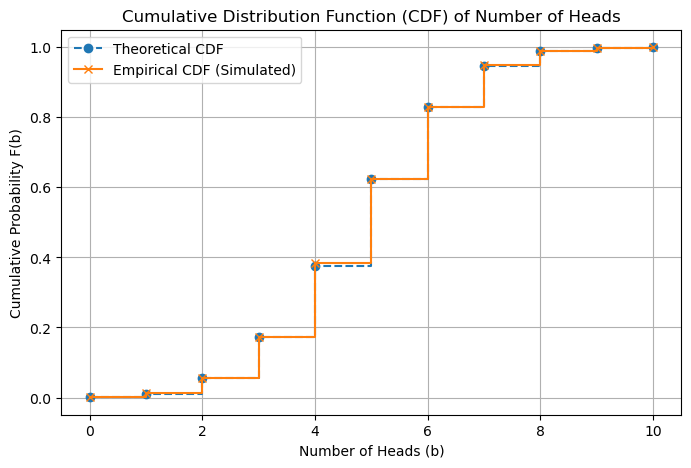

In [7]:

# Simulate the experiment
num_simulations = 10000
simulated_results = np.random.binomial(n, p, num_simulations)

# Compute empirical CDF
empirical_cdf = np.array([np.mean(simulated_results <= b) for b in x_values])

# Plot the CDF
plt.figure(figsize=(8, 5))
plt.step(x_values, cdf_values, label="Theoretical CDF", where="post", linestyle="--", marker="o")
plt.step(x_values, empirical_cdf, label="Empirical CDF (Simulated)", where="post", linestyle="-", marker="x")
plt.xlabel("Number of Heads (b)")
plt.ylabel("Cumulative Probability F(b)")
plt.title("Cumulative Distribution Function (CDF) of Number of Heads")
plt.legend()
plt.grid(True)
plt.show()


# Antique Shop Sales

In [10]:
np.random.seed(42)

# Simulation parameters
days = 365
customer_min = 5
customer_max = 15

daily_sales = []

for _ in range(days):
    # Number of customers
    num_customers = np.random.randint(customer_min, customer_max + 1)

    purchase_types = np.random.choice(
        ["souvenir", "regular", "rare"], 
        size=num_customers, 
        p=[0.6, 0.3, 0.1]
    )
    
    # Generate sales based on purchase type
    sales = []
    for purchase in purchase_types:
        if purchase == "souvenir":
            sales.append(np.random.uniform(10, 50))
        elif purchase == "regular":
            sales.append(np.random.uniform(50, 200))
        else:  # rare item
            sales.append(np.random.uniform(200, 2000))
    
    # Total daily sales
    daily_sales.append(sum(sales))

daily_sales = np.array(daily_sales)
daily_sales

array([ 548.85449616, 1481.02409352, 4699.77715467, 2723.52220711,
        407.46539445,  538.03181   , 2080.44287498, 2641.41467493,
        641.04328345, 2000.96405023,  896.90157386, 1674.18023912,
       2743.35320432, 1612.68883661, 2015.27799614, 2195.70371472,
       1579.750604  ,  957.46042242,  540.84103037,  504.56386423,
       1490.92917727, 1498.01212863, 4025.62109255, 3653.50416128,
       2269.92011173, 4984.29018396, 1444.525384  ,  385.81156847,
       2168.09230646, 1307.57624284,  504.44619338,  520.05628041,
        770.10581601,  724.13858922, 4201.55800712,  193.33711338,
        577.21727456, 1072.45997635,  697.91627652,  539.87766325,
       1531.22184894,  841.51874124,  201.84571972, 3449.47378914,
        650.88301918,  256.02671382,  410.81693455, 2191.23436484,
        370.69986321, 2039.60848585, 1350.01523767,  262.60616717,
       4215.76424145, 7218.09261969,  973.93831778, 2356.95614577,
       1179.7946    ,  710.88365752,  481.99484481, 1837.03625

In [12]:
# Estimate P(X > 10,000)
prob_x_gt_10000 = np.mean(daily_sales > 10000)
prob_x_gt_10000

0.0

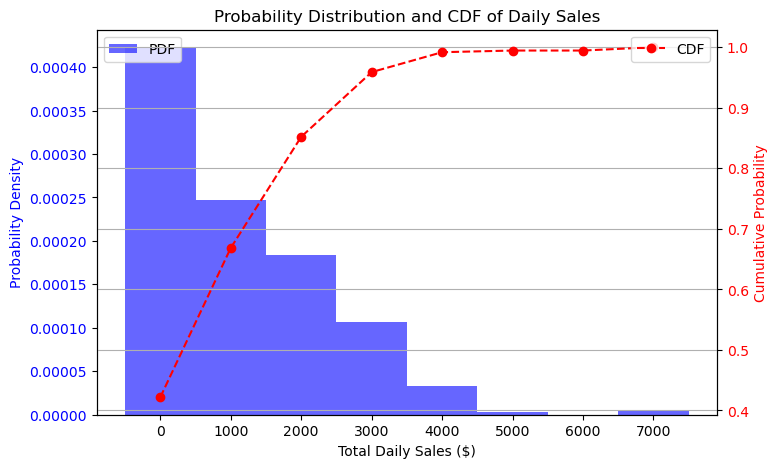

0.0

In [8]:
np.random.seed(42)

# Simulation parameters
days = 365
customer_min = 5
customer_max = 15

daily_sales = []

for _ in range(days):
    # Number of customers
    num_customers = np.random.randint(customer_min, customer_max + 1)

    purchase_types = np.random.choice(
        ["souvenir", "regular", "rare"], 
        size=num_customers, 
        p=[0.6, 0.3, 0.1]
    )
    
    # Generate sales based on purchase type
    sales = []
    for purchase in purchase_types:
        if purchase == "souvenir":
            sales.append(np.random.uniform(10, 50))
        elif purchase == "regular":
            sales.append(np.random.uniform(50, 200))
        else:  # rare item
            sales.append(np.random.uniform(200, 2000))
    
    # Total daily sales
    daily_sales.append(sum(sales))

# Convert to NumPy array
daily_sales = np.array(daily_sales)

# Step 2: Estimate P(X > 10,000)
prob_x_gt_10000 = np.mean(daily_sales > 10000)

# Step 3: Compute the probability distribution in $1,000 increments
bins = np.arange(0, max(daily_sales) + 1000, 1000)
hist, bin_edges = np.histogram(daily_sales, bins=bins, density=True)

# Step 4: Compute and plot the CDF
cdf = np.cumsum(hist * np.diff(bin_edges))  # CDF calculation

# Display probability estimate
prob_x_gt_10000

# Step 5: Plot PDF and CDF
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot PDF
ax1.bar(bin_edges[:-1], hist, width=1000, alpha=0.6, label="PDF", color="blue")
ax1.set_xlabel("Total Daily Sales ($)")
ax1.set_ylabel("Probability Density", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Create a second y-axis for the CDF
ax2 = ax1.twinx()
ax2.plot(bin_edges[:-1], cdf, color="red", marker="o", linestyle="--", label="CDF")
ax2.set_ylabel("Cumulative Probability", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# Titles and Legends
plt.title("Probability Distribution and CDF of Daily Sales")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.grid()
plt.show()

# Display probability estimate
prob_x_gt_10000


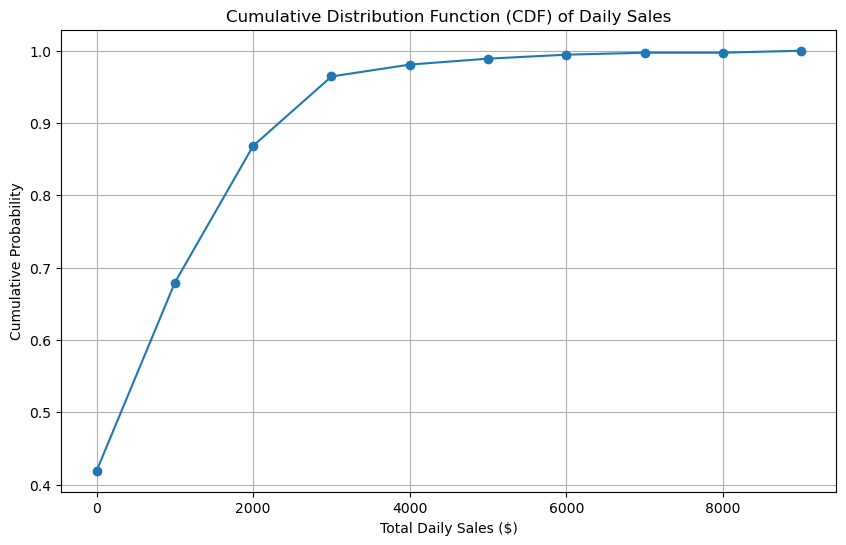


### Analysis of the CDF and Sales Trends

1. **Estimated Probability P(X > 10,000)**: 0.0000. This suggests that on average, the shop exceeds $10,000 in sales on 0.00% of days.
2. **Sales Distribution**:
   - The probability distribution shows that most daily sales fall within lower price ranges (e.g., below $5,000).
   - Higher sales are less frequent but still occur, driven by rare high-value item purchases.
3. **CDF Trends**:
   - The cumulative probability increases rapidly in the lower sales ranges, indicating that a majority of days have moderate sales.
   - The curve flattens towards the higher end, reflecting that extreme sales (e.g., >$10,000) are relatively rare.

These insights can help in inventory planning and pricing strategies to optimize revenue.



In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Set random seed for reproducibility
np.random.seed(42)

# Simulation parameters
num_days = 365
customer_min, customer_max = 5, 15  # Customers per day
souvenir_prob, regular_prob, rare_prob = 0.6, 0.3, 0.1  # Purchase probabilities

# Price ranges for each category
souvenir_price_range = (10, 50)  # Uniformly distributed between $10 and $50
regular_price_range = (50, 200)  # Uniformly distributed between $50 and $200
rare_price_range = (200, 2000)  # Uniformly distributed between $200 and $2000

# Simulating daily sales
daily_sales = []
for _ in range(num_days):
    num_customers = np.random.randint(customer_min, customer_max + 1)  # Random customer count
    sales = 0
    for _ in range(num_customers):
        category = np.random.choice(["souvenir", "regular", "rare"], p=[souvenir_prob, regular_prob, rare_prob])
        if category == "souvenir":
            sales += np.random.uniform(*souvenir_price_range)
        elif category == "regular":
            sales += np.random.uniform(*regular_price_range)
        elif category == "rare":
            sales += np.random.uniform(*rare_price_range)
    daily_sales.append(sales)

# Convert to NumPy array
daily_sales = np.array(daily_sales)

# 2. Estimate P(X > 10,000)
prob_exceed_10k = np.mean(daily_sales > 10000)

# 3. Probability distribution in $1,000 increments
bins = np.arange(0, max(daily_sales) + 1000, 1000)
hist, bin_edges = np.histogram(daily_sales, bins=bins, density=True)

# 4. Compute and plot the cumulative distribution function (CDF)
cdf = np.cumsum(hist * np.diff(bin_edges))  # CDF calculation

# Display probability distribution and CDF
sales_df = pd.DataFrame({"Sales Range": bin_edges[:-1], "Probability": hist, "Cumulative Probability": cdf})

# Plot CDF
plt.figure(figsize=(10, 6))
plt.plot(bin_edges[:-1], cdf, marker="o", linestyle="-")
plt.xlabel("Total Daily Sales ($)")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF) of Daily Sales")
plt.grid(True)
plt.show()

# Analysis:
analysis_text = f"""
### Analysis of the CDF and Sales Trends

1. **Estimated Probability P(X > 10,000)**: {prob_exceed_10k:.4f}. This suggests that on average, the shop exceeds $10,000 in sales on {prob_exceed_10k*100:.2f}% of days.
2. **Sales Distribution**:
   - The probability distribution shows that most daily sales fall within lower price ranges (e.g., below $5,000).
   - Higher sales are less frequent but still occur, driven by rare high-value item purchases.
3. **CDF Trends**:
   - The cumulative probability increases rapidly in the lower sales ranges, indicating that a majority of days have moderate sales.
   - The curve flattens towards the higher end, reflecting that extreme sales (e.g., >$10,000) are relatively rare.

These insights can help in inventory planning and pricing strategies to optimize revenue.
"""
print(analysis_text)


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Set random seed for reproducibility
np.random.seed(42)

# Simulation parameters
num_days = 365
customer_min, customer_max = 5, 15  # Customers per day
souvenir_prob, regular_prob, rare_prob = 0.6, 0.3, 0.1  # Purchase probabilities

# Price ranges for each category
souvenir_price_range = (10, 50)  # Uniformly distributed between $10 and $50
regular_price_range = (50, 200)  # Uniformly distributed between $50 and $200
rare_price_range = (200, 2000)  # Uniformly distributed between $200 and $2000

# Simulating daily sales
daily_sales = []
for _ in range(num_days):
    num_customers = np.random.randint(customer_min, customer_max + 1)  # Random customer count
    sales = 0
    for _ in range(num_customers):
        category = np.random.choice(["souvenir", "regular", "rare"], p=[souvenir_prob, regular_prob, rare_prob])
        if category == "souvenir":
            sales += np.random.uniform(*souvenir_price_range)
        elif category == "regular":
            sales += np.random.uniform(*regular_price_range)
        elif category == "rare":
            sales += np.random.uniform(*rare_price_range)
    daily_sales.append(sales)

# Convert to NumPy array
daily_sales = np.array(daily_sales)
daily_sales

array([1936.09162762,  340.9727636 , 3780.80122007, 2694.44488922,
        369.80308885,  389.08815336, 1545.47005864, 1896.1054834 ,
        599.48079465, 3242.83561535, 1928.0139898 ,  788.85951839,
       5411.70543257, 2044.74191314, 1843.03935653, 2777.72389648,
        382.19048608, 2249.98115151,  557.93237487,  445.88608226,
        511.30641962, 3184.10934138, 7429.9443961 , 2194.0949966 ,
       1565.63373463, 9184.15486049, 1255.9691706 ,  475.86358266,
       1711.676026  , 1459.57935116, 1829.53017298,  748.10047988,
        501.06809128, 1909.24744458, 3830.8959617 ,  176.77183885,
        487.40973675,  790.3620412 , 2240.47062235,  439.5669743 ,
       2064.72367646, 2302.26262792,  253.81525758, 2766.38285564,
        713.61797303,  235.00363468,  409.48362779, 3427.22050515,
        424.34026186,  754.80722868, 2338.59318235,  327.2635116 ,
       3782.32716849, 4916.27806155, 3183.01561443, 5560.82504026,
       1211.95912433, 2564.59911898,  477.21364124, 1714.76600

In [16]:
# 2. Estimate P(X > 10,000)
prob_exceed_10k = np.mean(daily_sales > 10000)
prob_exceed_10k

0.0

In [17]:
# 3. Probability distribution in $1,000 increments
bins = np.arange(0, max(daily_sales) + 1000, 1000)
hist, bin_edges = np.histogram(daily_sales, bins=bins, density=True)

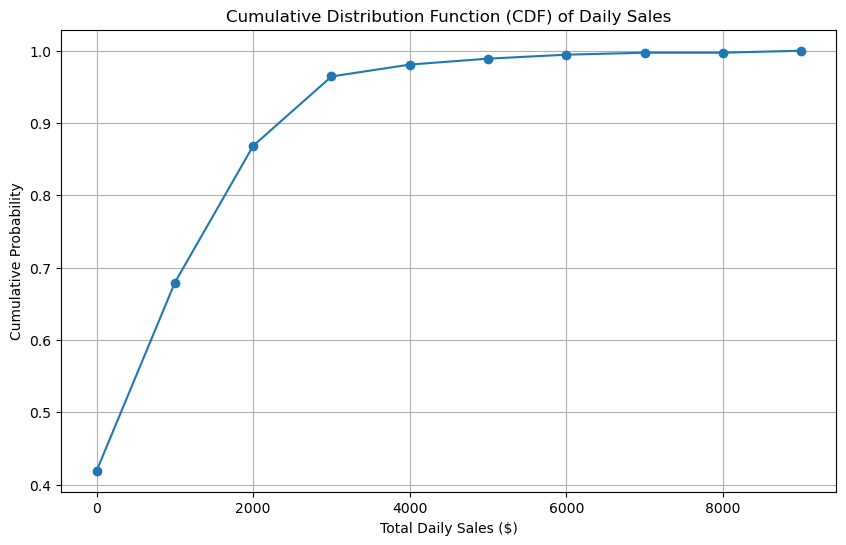


### Analysis of the CDF and Sales Trends

1. **Estimated Probability P(X > 10,000)**: 0.0000. This suggests that on average, the shop exceeds $10,000 in sales on 0.00% of days.
2. **Sales Distribution**:
   - The probability distribution shows that most daily sales fall within lower price ranges (e.g., below $5,000).
   - Higher sales are less frequent but still occur, driven by rare high-value item purchases.
3. **CDF Trends**:
   - The cumulative probability increases rapidly in the lower sales ranges, indicating that a majority of days have moderate sales.
   - The curve flattens towards the higher end, reflecting that extreme sales (e.g., >$10,000) are relatively rare.

These insights can help in inventory planning and pricing strategies to optimize revenue.



In [18]:
# 4. Compute and plot the cumulative distribution function (CDF)
cdf = np.cumsum(hist * np.diff(bin_edges))  # CDF calculation

# Display probability distribution and CDF
sales_df = pd.DataFrame({"Sales Range": bin_edges[:-1], "Probability": hist, "Cumulative Probability": cdf})

# Plot CDF
plt.figure(figsize=(10, 6))
plt.plot(bin_edges[:-1], cdf, marker="o", linestyle="-")
plt.xlabel("Total Daily Sales ($)")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF) of Daily Sales")
plt.grid(True)
plt.show()

# Analysis:
analysis_text = f"""
### Analysis of the CDF and Sales Trends

1. **Estimated Probability P(X > 10,000)**: {prob_exceed_10k:.4f}. This suggests that on average, the shop exceeds $10,000 in sales on {prob_exceed_10k*100:.2f}% of days.
2. **Sales Distribution**:
   - The probability distribution shows that most daily sales fall within lower price ranges (e.g., below $5,000).
   - Higher sales are less frequent but still occur, driven by rare high-value item purchases.
3. **CDF Trends**:
   - The cumulative probability increases rapidly in the lower sales ranges, indicating that a majority of days have moderate sales.
   - The curve flattens towards the higher end, reflecting that extreme sales (e.g., >$10,000) are relatively rare.

These insights can help in inventory planning and pricing strategies to optimize revenue.
"""
print(analysis_text)